## Brain Tumor Classification

### Importing libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os
import cv2

### Uploading pics

In [57]:
path = ('Training/')
classes = {'no_tumor' : 0, 'pituitary_tumor' : 1}

X = []
y = []

In [58]:
for cls in classes:
    pth = 'Training/' + cls
    for image in os.listdir(pth):
        img = cv2.imread(pth + '/' + image, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        y.append(classes[cls])

In [59]:
np.unique(Y)

array([0, 1])

In [60]:
X = np.array(X)
y = np.array(y)

In [62]:
pd.Series(y).value_counts()

1    827
0    395
dtype: int64

In [63]:
X.shape

(1222, 200, 200)

### Choosing Best Algorithm

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [72]:
classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)))
classification_models.append(('Kernel SVM', SVC(kernel = 'rbf',gamma='scale')))
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))
seed = 7
for name, model in classification_models:
    kfold = KFold(n_splits=10, random_state=seed)
    result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

### Visualize

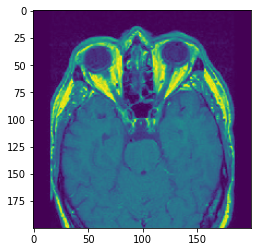

In [8]:
plt.imshow(X[0])

In [9]:
X = X.reshape(len(X), -1)
X.shape

(1222, 40000)

### Split Data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 10, test_size = 0.20)

In [29]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 2, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 2, 2],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [30]:
X_train = X_train / 255
X_test = X_test / 255

In [31]:
X_train.max()

1.0

### Training

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [34]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C = 0.1)
lg.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [35]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [36]:
print("Train Score: ", lg.score(X_train, y_train))
print("Test Score: ", lg.score(X_test, y_test))

Train Score:  1.0
Test Score:  0.9591836734693877


In [37]:
print("Train Score: ", svm.score(X_train, y_train))
print("Test Score: ", svm.score(X_test, y_test))

Train Score:  0.9938587512794268
Test Score:  0.963265306122449


In [39]:
y_pred = svm.predict(X_test)
np.where(y_test != y_pred)

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

### Testing

In [40]:
dictionary = {0 : 'No Tumor', 1 : 'Positive Tumor'}

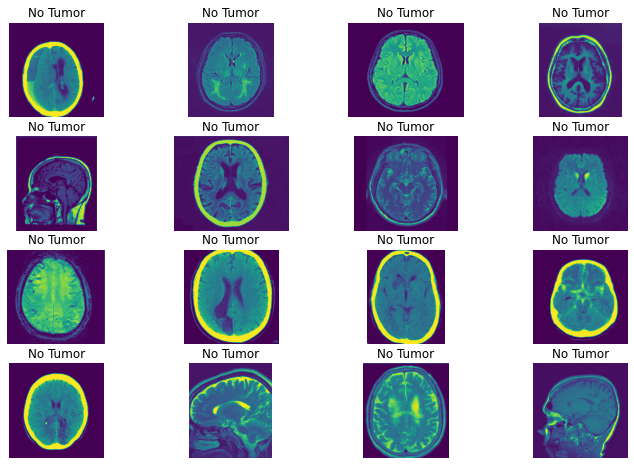

In [47]:
plt.figure(figsize = (12, 8))
path = os.listdir('Testing/no_tumor/')
counter = 1

for i in os.listdir('Testing/no_tumor/')[:16]:
    plt.subplot(4, 4, counter)
    image = cv2.imread('Testing/no_tumor/' + i, 0)
    image1 = cv2.resize(image, (200, 200))
    image1 = image1.reshape(1, -1) / 255
    prediction = svm.predict(image1)
    
    plt.title(dictionary[prediction[0]])
    plt.imshow(image)
    plt.axis('off')
    counter = counter + 1
    

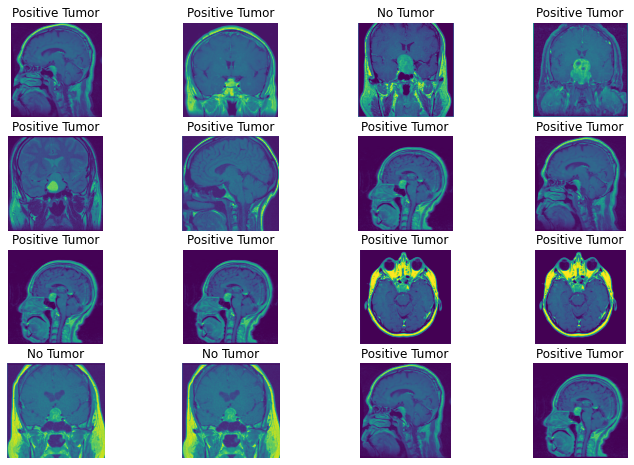

In [48]:
plt.figure(figsize = (12, 8))
path = os.listdir('Testing/pituitary_tumor/')
counter = 1

for i in os.listdir('Testing/pituitary_tumor/')[:16]:
    plt.subplot(4, 4, counter)
    image = cv2.imread('Testing/pituitary_tumor/' + i, 0)
    image1 = cv2.resize(image, (200, 200))
    image1 = image1.reshape(1, -1) / 255
    prediction = svm.predict(image1)
    
    plt.title(dictionary[prediction[0]])
    plt.imshow(image)
    plt.axis('off')
    counter = counter + 1
    